In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Data Loding and Overview

In [209]:
# Read in Song Attributes data
df = pd.read_csv("song_attributes.csv")
df.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.1970,0,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.988,['Carl Woitschach'],0.555,153967,0.4210,0,6OJjveoYwJdIt76y0Pxpxw,0.836,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928


Check if any columns contain missing data or only a single unique value.

In [129]:
print(f'There are {df.isnull().any().sum()} columns in this dataset df with missing values')

single_val_col = [col for col in df.columns if df[col].nunique() <= 1]
print(f'There are {len(single_val_col)} columns in df with one unique value.')

There are 0 columns in this dataset df with missing values
There are 0 columns in df with one unique value.


### Data Visualisation

In [4]:
sns.set(color_codes=True)
sns.set_style("dark")


#### Plot the frequencies of song features to have an overview of their distributions

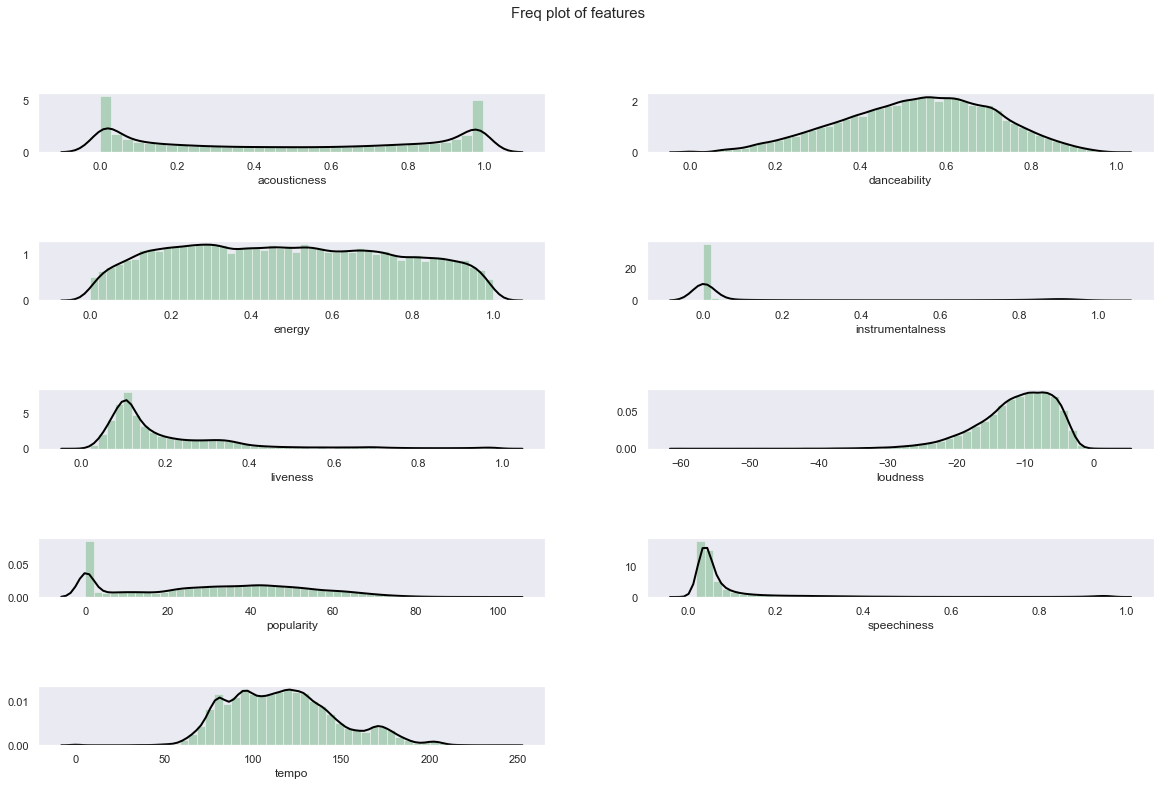

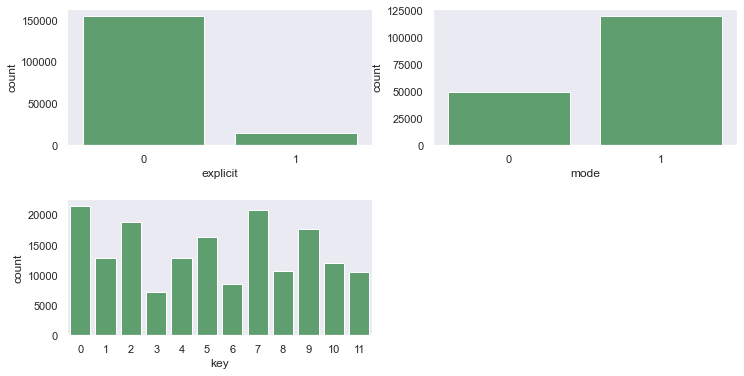

In [134]:
## plot histograms for continuous variables
def dist_plot(feature, i, kde_color, hist_color):
    sns.distplot(df[feature], kde=True, ax=ax[i//2, i%2],
                kde_kws={"color": kde_color, "lw":2}, color = hist_color).set_xlabel(feature)


fig, ax = plt.subplots(5, 2, figsize=(20,12))

kde_color = "black"
hist_color = "g"

col2check = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", 
             "popularity", "speechiness", "tempo", "valence"]


for i, column in enumerate(col2check):
    dist_plot(column, i, kde_color, hist_color) 

fig.suptitle('Freq plot of features', fontsize = 15)

# make the subplots not overlap with each other...
fig.subplots_adjust(hspace=1.5)


## plot the categorical/dummy variables
fig, ax = plt.subplots(2,2, figsize=(2*6,2*3), squeeze=False)

categVar = ["explicit", "mode","key"] 

for i, var in enumerate(categVar):
    varCount = df[var].value_counts()
    vc_df = pd.DataFrame({'option': varCount.index, 'count': varCount.values})

    bp = sns.barplot(x="option", y="count", data=vc_df, color="g", ax=ax[i//2, i%2]).set_xlabel(var)

fig.delaxes(ax[1,1])
fig.subplots_adjust(hspace=0.4)

### Visualise song distributions by year (of release) in the database

Text(0.5, 1.0, 'Average Song Duration by Year')

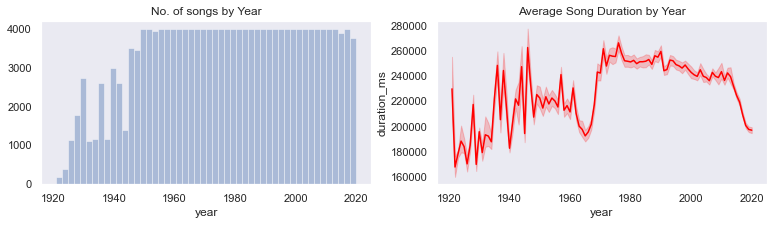

In [184]:
fig, ax = plt.subplots(1,2, figsize=(2*6.5,1*3), squeeze=False)
# Add a histogram to visualise the frequency of songs by year in the database
sns.distplot(df['year'], kde=False, ax=ax[0, 0]).set_title("No. of songs by Year")

# Add a lineplot to visualise the average duration of songs by year in the database
sns.lineplot(x="year", y="duration_ms", data=df, color="red", ax=ax[0,1]).set_title("Average Song Duration by Year")

#### Visualise potential variability of song features BY YEAR
Plot only features that contain values within the range between 0 and 1 first. (Some features including 'loudness', 'popularity', 'tempo' have much larger or smaller (-ve) values)

From this preliminary exploration, there appears a vast decline in 'acousticness' and some increase in 'energy' in songs over the year.

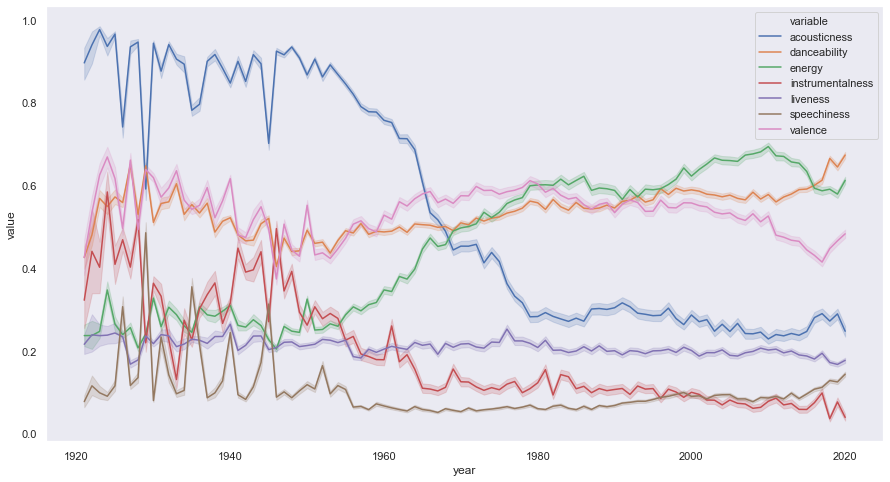

In [186]:
# there features are within the range between 0 and 1
col2plot = ["year", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]

plt.figure(figsize=(15,8))
sns.lineplot(x='year', y='value', hue='variable', data=pd.melt(df[col2plot], ['year']))

Now, normalise (rescale) the few features that are on a scale of much larger or smaller (-ve) values, including **'loudness', 'popularity', 'tempo'**. Then, include these rescaled features in the lineplot again.  

'Popularity' (yellow line in the plot below) seems to change over the years while 'loudness' and 'tempo' of songs remains more or less the same. 

In [201]:
# Normalise these features with very large/small (-ve) values
col2norm = ["loudness", "popularity", "tempo"]

for var in col2norm: 
    nml_var = (df[var] - df[var].min()) / (df[var].max() - df[var].min())
    var_name = "nml_{0}".format(var)
    df[var_name] = nml_var

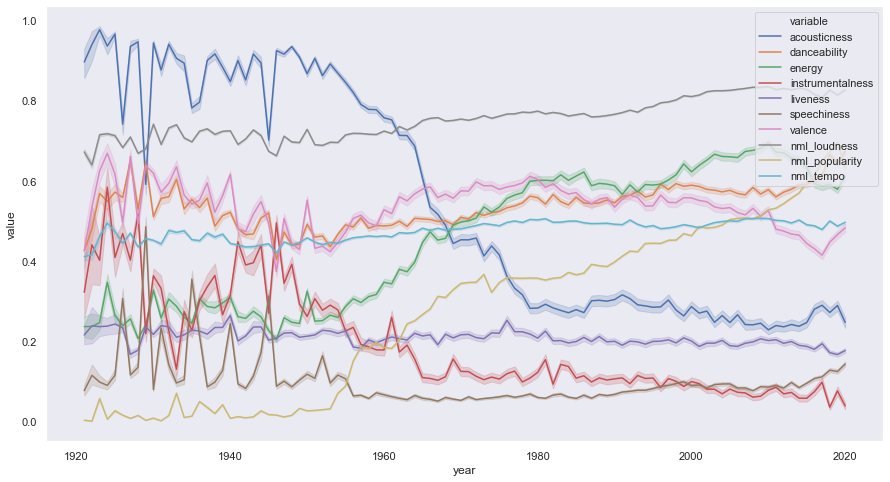

In [208]:
# Create a lineplot again with the rescaled features
##this line add the new variable names into the 'col2plot' list
[col2plot.append("nml_{0}".format(var)) for var in col2norm]

plt.figure(figsize=(15,8))
sns.lineplot(x='year', y='value', hue='variable', data=pd.melt(df[col2plot], ['year']))
plt.legend(loc='upper right')
